In [39]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
!pip install statsmodels scipy

In [41]:
# library
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import anova_lm
from scipy.stats import pearsonr



In [42]:
# ==============================
# Load the CSV (adjust the path if necessary)
# ==============================
df = pd.read_csv("/content/drive/MyDrive/ProcesamientoImagenes/Treated.csv")

In [43]:
# ==============================
# Clean columns
# ==============================
df.columns = df.columns.str.strip()

In [44]:
# ==================================================================================================================================================================================================================
# Discard the columns that appear in the representations. Keep only the columns with treatment, dose, unit of measurement, surface area, application method, and average number of lesions.
# ==================================================================================================================================================================================================================
columnas_deseadas = [
    "TREATMENT",
    "DOSE",
    "UNIT OF MEASUREMENT",
    "SURFACE",
    "APPLICATION METHOD",
    "NUMBER OF REPETITION INJURIES 1",
    "NUMBER OF REPETITION INJURIES 2",
    "NUMBER OF REPETITION INJURIES 3",
    "AVERAGE INJURIES"
]

df = df[columnas_deseadas]
#print(df.head())

# Mean ± error

In [45]:
#========================================================================================================================
# Remove the rows containing the words 'healthy'  since in those cases no dose or treatment was applied.
#========================================================================================================================
df = df[~df['SURFACE'].isin(['HEALTHY'])].reset_index(drop=True)

In [46]:
# ==============================
#Create a new DataFrame with the necessary columns
# ==============================
df_join = df.copy()

In [47]:
# ==============================
#Enter the dose with one decimal place.
# ==============================
df_join["DOSE"] = df_join["DOSE"].round(1)

In [48]:
# ==============================
# Create a new unified column
# ==============================
df_join["DOSE_APPLICATION"] = (
    df_join["TREATMENT"].astype(str) + " " +
    df_join["DOSE"].astype(str) + " " +
    df_join["UNIT OF MEASUREMENT"].astype(str) + " " +
    df_join["SURFACE"].astype(str) + " " +
    df_join["APPLICATION METHOD"].astype(str)
)

In [49]:
# ==============================
# Show the first values ​​to verify
# ==============================
print(df_join.head())

  TREATMENT  DOSE UNIT OF MEASUREMENT             SURFACE APPLICATION METHOD  \
0      SOAP   5.0                  mL  GREENHOUSE PLASTIC           SPRAYING   
1      SOAP   5.0                  mL     PRUNING SHEARS            SPRAYING   
2      SOAP   5.0                  mL     PRUNING SHEARS             DIPPING   
3      SOAP   7.5                  mL  GREENHOUSE PLASTIC           SPRAYING   
4      SOAP   7.5                  mL     PRUNING SHEARS            SPRAYING   

   NUMBER OF REPETITION INJURIES 1  NUMBER OF REPETITION INJURIES 2  \
0                                1                                1   
1                                0                                2   
2                                5                               21   
3                                2                                1   
4                               16                                5   

   NUMBER OF REPETITION INJURIES 3  AVERAGE INJURIES  \
0                                2  

In [50]:
# ============================================================
# Calculate the mean and standard error from the three repetitions
# ============================================================
# Create a column with the average of the three repetitions.
df_join["MEAN_INJURIES"] = df_join[[
    "NUMBER OF REPETITION INJURIES 1",
    "NUMBER OF REPETITION INJURIES 2",
    "NUMBER OF REPETITION INJURIES 3"
]].mean(axis=1)



In [51]:
# Create a column with the standard deviation per row
df_join["SD_INJURIES"] = df_join[[
    "NUMBER OF REPETITION INJURIES 1",
    "NUMBER OF REPETITION INJURIES 2",
    "NUMBER OF REPETITION INJURIES 3"
]].std(axis=1)

In [52]:
# ==============================
# Calculate statistics per dose
# ==============================
resumen = df_join.groupby(["TREATMENT", "DOSE_APPLICATION"])["MEAN_INJURIES"].agg(
    media="mean",
    desviacion="std",
    n="count"
).reset_index()

In [53]:
# ==============================
# Calculate the standard error of the mean (SEM)
# ==============================
resumen["error"] = resumen["desviacion"] / np.sqrt(resumen["n"])

In [54]:
# ==============================
# Create columns with the formats "mean ± deviation" and "mean ± error"
# ==============================
resumen["Media ± SD"] = resumen["media"].round(2).astype(str) + " ± " + resumen["desviacion"].round(2).astype(str)
resumen["Media ± Error"] = resumen["media"].round(2).astype(str) + " ± " + resumen["error"].round(2).astype(str)


In [55]:
# Show the result
print("=== RESULTADOS: Media ± Desviación Estándar y Media ± Error ===")
print(resumen[["DOSE_APPLICATION", "Media ± SD", "Media ± Error"]])

=== RESULTADOS: Media ± Desviación Estándar y Media ± Error ===
                                     DOSE_APPLICATION   Media ± SD  \
0               GLUTARALDEHYDE 0.0 ppm POSITIVE WATER   66.0 ± nan   
1   GLUTARALDEHYDE 1000.0 ppm GREENHOUSE PLASTIC S...  12.33 ± nan   
2   GLUTARALDEHYDE 1000.0 ppm PRUNING SHEARS  DIPPING   15.0 ± nan   
3   GLUTARALDEHYDE 1000.0 ppm PRUNING SHEARS  SPRA...  10.67 ± nan   
4   GLUTARALDEHYDE 1500.0 ppm GREENHOUSE PLASTIC S...  17.67 ± nan   
..                                                ...          ...   
78                SOAP 5.0 mL PRUNING SHEARS  DIPPING   10.0 ± nan   
79               SOAP 5.0 mL PRUNING SHEARS  SPRAYING    2.0 ± nan   
80            SOAP 7.5 mL GREENHOUSE PLASTIC SPRAYING    1.0 ± nan   
81                SOAP 7.5 mL PRUNING SHEARS  DIPPING   10.0 ± nan   
82               SOAP 7.5 mL PRUNING SHEARS  SPRAYING  11.33 ± nan   

   Media ± Error  
0     66.0 ± nan  
1    12.33 ± nan  
2     15.0 ± nan  
3    10.67 ± nan  


In [56]:
# ==============================
# Save the complete results to a file.
# ==============================
ruta_salida = "/content/drive/MyDrive/ProcesamientoImagenes/Resultados_completos.csv"
resumen.to_csv(ruta_salida, index=False, encoding='utf-8-sig')
print(f"\nArchivo guardado en: {ruta_salida}")



Archivo guardado en: /content/drive/MyDrive/ProcesamientoImagenes/Resultados_completos.csv


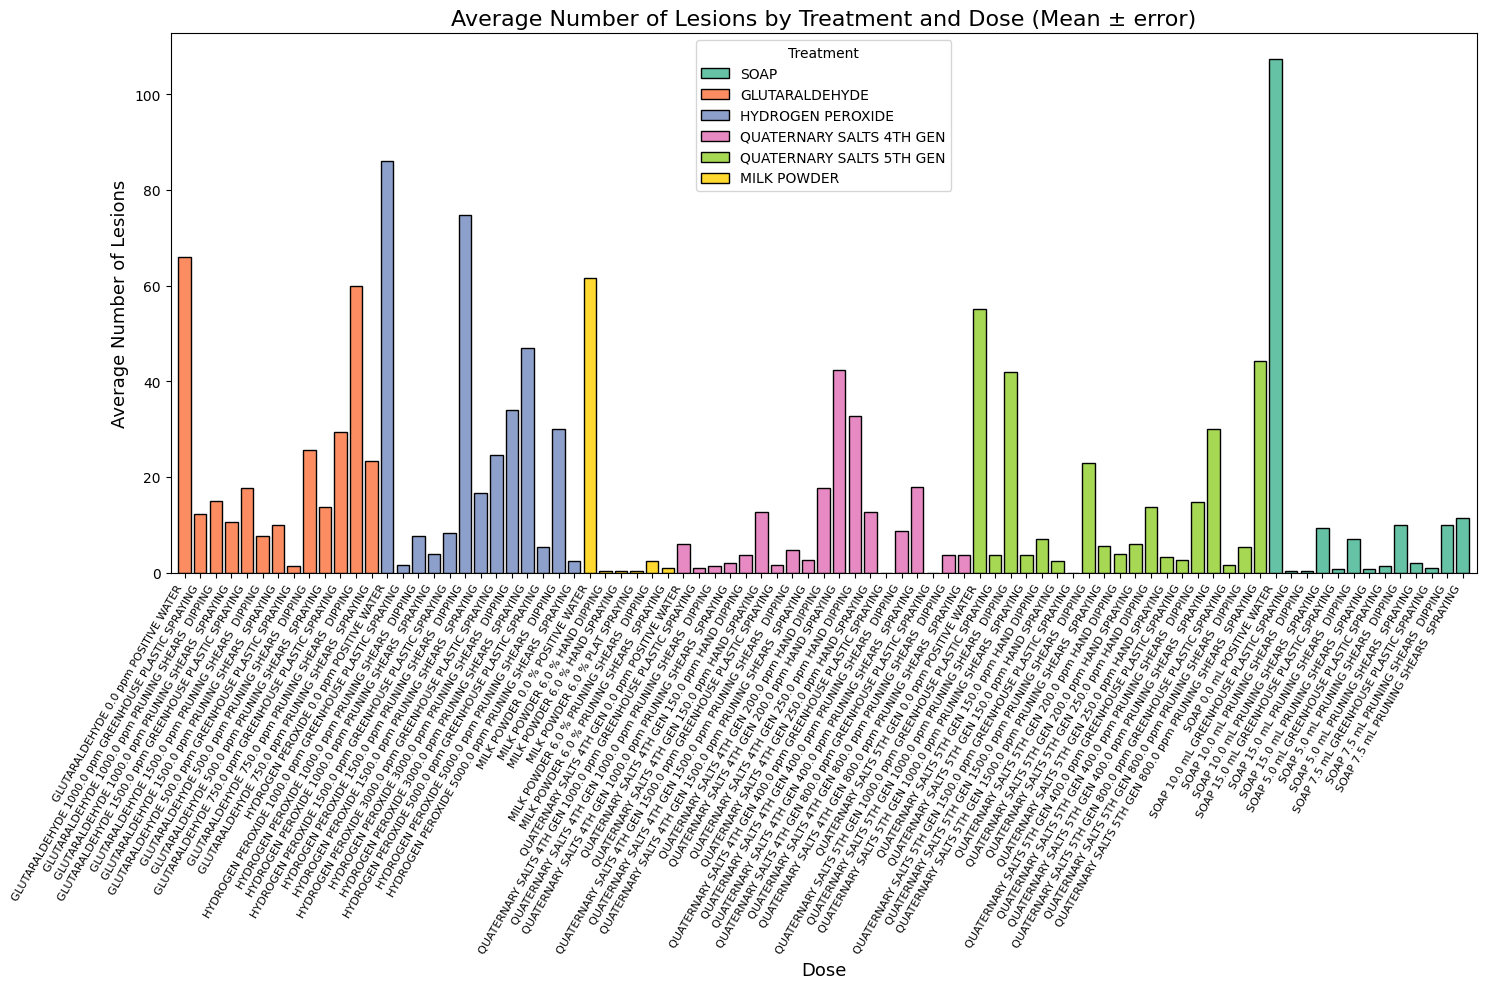

In [57]:
# ===========================================================
# Create a color palette by treatment
# ===========================================================
tratamientos = df_join["TREATMENT"].unique()
palette = sns.color_palette("Set2", len(tratamientos))
color_dict = dict(zip(tratamientos, palette))

# Assign the corresponding color to each bar in the summary
resumen["color"] = resumen["TREATMENT"].map(color_dict)

# ===========================================================
# Graph bars: Mean ± Standard error
# ===========================================================
plt.figure(figsize=(15, 10))

plt.bar(
    resumen["DOSE_APPLICATION"],
    resumen["media"],
    yerr=resumen["error"],
    capsize=5,
    color=resumen["color"],
    edgecolor='black'
)

# ===========================================================
# Chart customization
# ===========================================================
plt.title("Average Number of Lesions by Treatment and Dose (Mean ± error)", fontsize=16)
plt.xlabel("Dose", fontsize=13)
plt.ylabel("Average Number of Lesions", fontsize=13)
plt.xticks(rotation=60, ha='right', fontsize=8)


# Remove grid from chart
plt.grid(False)

# Reduce empty space at the ends (adjust X-axis limits)
plt.xlim(-0.9, len(resumen["DOSE_APPLICATION"]) - 0.1)

# ===========================================================
# Color legend by treatment
# ===========================================================
handles = [plt.Rectangle((0, 0), 1, 1, color=color_dict[t], ec="black") for t in tratamientos]
plt.legend(handles, tratamientos, title="Treatment", loc='upper center')

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ProcesamientoImagenes/Barras_desviacion_dosis_media.tiff", dpi=300, format="tiff",bbox_inches='tight', pad_inches=0.01)
plt.show()



# ANOVA + Tukey HSD for dose

In [58]:
#========================================================================================================================
# Remove the rows containing the words 'sana' and 'positiva', since in those cases no dose or treatment was applied.
#========================================================================================================================
df = df[~df['SURFACE'].isin(['HEALTHY', 'POSITIVE'])].reset_index(drop=True)

#========================================================================================================================
# Remove specific rows because they have leaves damaged by phytotoxicity
#========================================================================================================================

df = df[~(
    (df['TREATMENT'] == 'QUATERNARY SALTS 4TH GEN') &
    (df['DOSE'].isin([400, 800])) &
    (df['UNIT OF MEASUREMENT'] == 'ppm') &
    (df['SURFACE'] == 'GREENHOUSE PLASTIC') &
    (df['APPLICATION METHOD'] == 'SPRAYING')
)]


In [59]:
# =======================
# Normality test (Shapiro-Wilk) by group
# =======================
def verificar_normalidad(df, columna):
    print(f"\n=== NORMALITY VERIFICATION (Shapiro-Wilk) for '{columna}' ===")
    resultados_normalidad = {}
    for grupo, datos in df.groupby("TREATMENT")[columna]:
        datos = datos.dropna().replace([np.inf, -np.inf], np.nan).dropna()
        if len(datos) < 3:
            print(f"TREATMENT {grupo}: there is not enough data for the test (n={len(datos)})")
            resultados_normalidad[grupo] = None
            continue
        stat, p = stats.shapiro(datos)
        cumple_normalidad = p > 0.05
        resultados_normalidad[grupo] = cumple_normalidad
        print(f"TREATMENT {grupo}: W={stat:.4f}, p={p:.4f} -> {'Normal' if cumple_normalidad else 'Not normal'}")
    return resultados_normalidad

In [60]:
# =======================
# Test of homogeneity of variances
# =======================
def verificar_homogeneidad_levene(df, columna):
    print(f"\n=== Levene's test for homogeneity of variances'{columna}' ===")

    # Create a list of groups by treatment
    grupos = [valores[columna].dropna().values for _, valores in df.groupby("TREATMENT")]

    # Run Levene's test
    stat_levene, p_levene = stats.levene(*grupos)

    # Interpretation
    homogeneas = p_levene > 0.05
    print(f"Statistical = {stat_levene:.4f}, p-value = {p_levene:.4f} -> {'Homogeneous' if homogeneas else 'Not Homogeneous'}")
    return homogeneas

In [61]:
def anova_tukey(df, columna):
    print(f"\n=== ANOVA + TUKEY HSD applied to '{columna}' ===")

    # ==============================
    # One-way ANOVA
    # ==============================
    modelo = ols(f"{columna} ~ C(TREATMENT) + C(DOSE)", data=df).fit()
    anova_resultados = sm.stats.anova_lm(modelo, typ=2)
    print("\n--- Results ANOVA ---")
    print(anova_resultados)

    # ==============================
    #Tukey HSD test
    # ==============================
    tukey = pairwise_tukeyhsd(df[columna], groups=df["TREATMENT"],alpha=0.05)
    print("\n--- TUKEY HSD TEST ---")
    print(tukey.summary())

    return anova_resultados, tukey

In [62]:
# ==============================
# Evaluate whether it meets the conditions for ANOVA
# ==============================
#Evaluate normality and homogeneity, apply transformations if necessary, and perform ANOVA + Tukey HSD when the assumptions are met.

print("=== START OF THE ANALYSIS ===")

# Step 1. Evaluate original data
normalidad = verificar_normalidad(df, 'AVERAGE INJURIES')
homogeneidad = verificar_homogeneidad_levene(df, 'AVERAGE INJURIES')
normales = all(v for v in normalidad.values() if v is not None)
if normales and homogeneidad:
  print("\nThe original data meet the assumptions. ANOVA + Tukey HSD is applied.")


# Step 2. Apply logarithmic transformation
else:
    print("\nThe data do NOT meet the assumptions (normality and homogeneity of variances) of ANOVA.")
    print("Logarithmic or square root transformation will be applied to stabilize variances and improve normality.")

    print("Applying LOGARITHMIC transformation...")
    #Remove columns with 0 in the average
    df = df[df["AVERAGE INJURIES"] != 0]
    # Avoid zero or negative logs and apply the transformation
    df['TRANSFORMED'] = np.log(df["AVERAGE INJURIES"].replace(0, np.nan).dropna())
    normalidad = verificar_normalidad(df, 'TRANSFORMED')
    homogeneidad = verificar_homogeneidad_levene(df, 'TRANSFORMED')

    normales = all(v for v in normalidad.values() if v is not None)
    if normales and homogeneidad:
        print("\nThe log-transformed data meet the assumptions. ANOVA + Tukey HSD is applied.")



=== START OF THE ANALYSIS ===

=== NORMALITY VERIFICATION (Shapiro-Wilk) for 'AVERAGE INJURIES' ===
TREATMENT GLUTARALDEHYDE: W=0.8190, p=0.0155 -> Not normal
TREATMENT HYDROGEN PEROXIDE: W=0.8412, p=0.0287 -> Not normal
TREATMENT MILK POWDER: W=0.7348, p=0.0214 -> Not normal
TREATMENT QUATERNARY SALTS 4TH GEN: W=0.7707, p=0.0011 -> Not normal
TREATMENT QUATERNARY SALTS 5TH GEN: W=0.7481, p=0.0003 -> Not normal
TREATMENT SOAP: W=0.7799, p=0.0056 -> Not normal

=== Levene's test for homogeneity of variances'AVERAGE INJURIES' ===
Statistical = 2.0263, p-value = 0.0856 -> Homogeneous

The data do NOT meet the assumptions (normality and homogeneity of variances) of ANOVA.
Logarithmic or square root transformation will be applied to stabilize variances and improve normality.
Applying LOGARITHMIC transformation...

=== NORMALITY VERIFICATION (Shapiro-Wilk) for 'TRANSFORMED' ===
TREATMENT GLUTARALDEHYDE: W=0.8974, p=0.1467 -> Normal
TREATMENT HYDROGEN PEROXIDE: W=0.9608, p=0.7946 -> Normal
TR

In [63]:
resultadoAnova, resultadoTukey = anova_tukey(df, 'TRANSFORMED')


=== ANOVA + TUKEY HSD applied to 'TRANSFORMED' ===

--- Results ANOVA ---
                 sum_sq    df         F    PR(>F)
C(TREATMENT)  38.820093   5.0  6.290563  0.000128
C(DOSE)       81.519558  19.0  3.476252  0.000201
Residual      62.945865  51.0       NaN       NaN

--- TUKEY HSD TEST ---
                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                   group2          meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------
          GLUTARALDEHYDE        HYDROGEN PEROXIDE   -0.157 0.9994  -1.518  1.2039  False
          GLUTARALDEHYDE              MILK POWDER  -3.1211    0.0 -4.8956 -1.3466   True
          GLUTARALDEHYDE QUATERNARY SALTS 4TH GEN  -0.8718 0.3485 -2.1449  0.4012  False
          GLUTARALDEHYDE QUATERNARY SALTS 5TH GEN  -0.6284 0.6867 -1.8853  0.6285  False
          GLUTARALDEHYDE                     SOAP  -1.8655  0.002 -3.2264 -0.5

In [64]:
# ==============================
# Determine the best and worst doses per treatment
# ==============================
promedios = df.groupby(["TREATMENT", "DOSE","SURFACE", "APPLICATION METHOD","AVERAGE INJURIES"])["TRANSFORMED"].mean().reset_index()

# Identify best (minimum) and worst (maximum)
mejores = promedios.loc[promedios.groupby("TREATMENT")["TRANSFORMED"].idxmin()].round(2) #Round the DOSE and AVERAGE INJURIES columns to 2 decimal places
peores = promedios.loc[promedios.groupby("TREATMENT")["TRANSFORMED"].idxmax()].round(2) #Round the DOSE and AVERAGE INJURIES columns to 2 decimal places

print("\nBetter doses per treatment (lower average number of injuries):")
print(mejores)
print("\nWorst doses per treatment (highest average number of injuries):")
print(peores)


Better doses per treatment (lower average number of injuries):
                   TREATMENT    DOSE             SURFACE APPLICATION METHOD  \
0             GLUTARALDEHYDE   500.0  GREENHOUSE PLASTIC           SPRAYING   
12         HYDROGEN PEROXIDE  1000.0  GREENHOUSE PLASTIC           SPRAYING   
24               MILK POWDER     6.0                HAND           SPRAYING   
39  QUATERNARY SALTS 4TH GEN  1000.0  GREENHOUSE PLASTIC           SPRAYING   
54  QUATERNARY SALTS 5TH GEN   800.0  GREENHOUSE PLASTIC           SPRAYING   
68                      SOAP    10.0  GREENHOUSE PLASTIC           SPRAYING   

    AVERAGE INJURIES  TRANSFORMED  
0               1.33         0.29  
12              1.67         0.51  
24              0.33        -1.10  
39              1.00         0.00  
54              1.67         0.51  
68              0.33        -1.10  

Worst doses per treatment (highest average number of injuries):
                   TREATMENT    DOSE          SURFACE APPLICATION

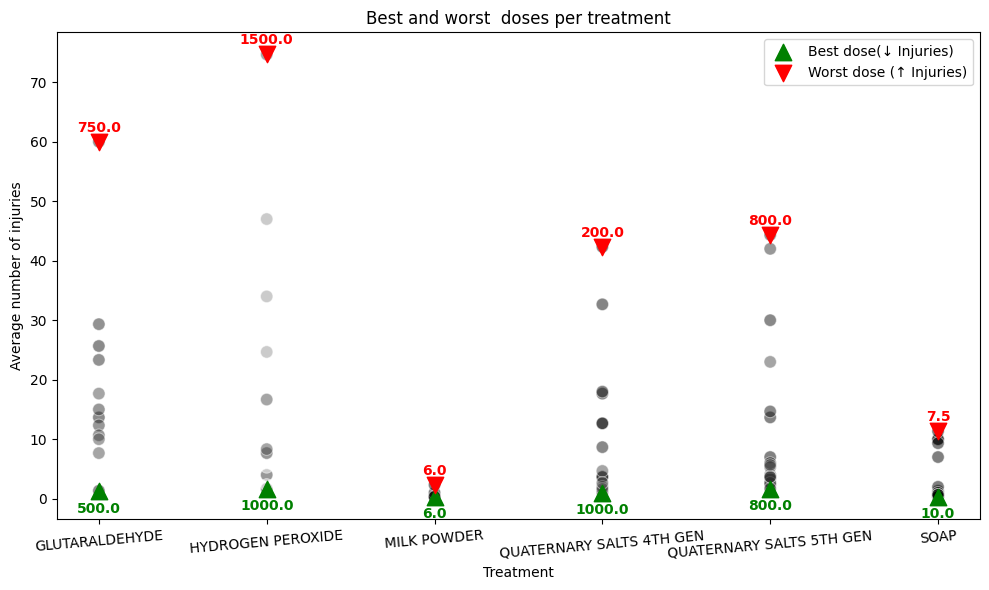

In [65]:
# ==============================
# Graph of best and worst doses on a logarithmic scale
# ==============================
plt.figure(figsize=(10, 6))

# Plot all baseline points
sns.scatterplot(data=promedios, x="TREATMENT", y="AVERAGE INJURIES",
                hue="DOSE", palette="gray", s=80, alpha=0.5, legend=False)

#Graph best (green) and worst (red)
plt.scatter(mejores["TREATMENT"], mejores["AVERAGE INJURIES"],
            color="green", s=140, marker="^", label="Best dose(↓ Injuries)")
plt.scatter(peores["TREATMENT"], peores["AVERAGE INJURIES"],
            color="red", s=140, marker="v", label="Worst dose (↑ Injuries)")

# Add tags
for _, fila in mejores.iterrows():
    plt.text(fila["TREATMENT"], fila["AVERAGE INJURIES"] - 1.8, f"{fila['DOSE']}",
             color="green", ha='center', va='top', fontsize=10, fontweight='bold')
for _, fila in peores.iterrows():
    plt.text(fila["TREATMENT"], fila["AVERAGE INJURIES"] + 1.2, f"{fila['DOSE']}",
             color="red", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Best and worst  doses per treatment")
plt.ylabel("Average number of injuries")
plt.xlabel("Treatment")
plt.legend()
plt.xticks(rotation=5)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ProcesamientoImagenes/ANOVA_TukeyHSD_Lesions_Dose_Treatment.tiff", dpi=500, format="tiff",bbox_inches='tight', pad_inches=0.01)
plt.show()

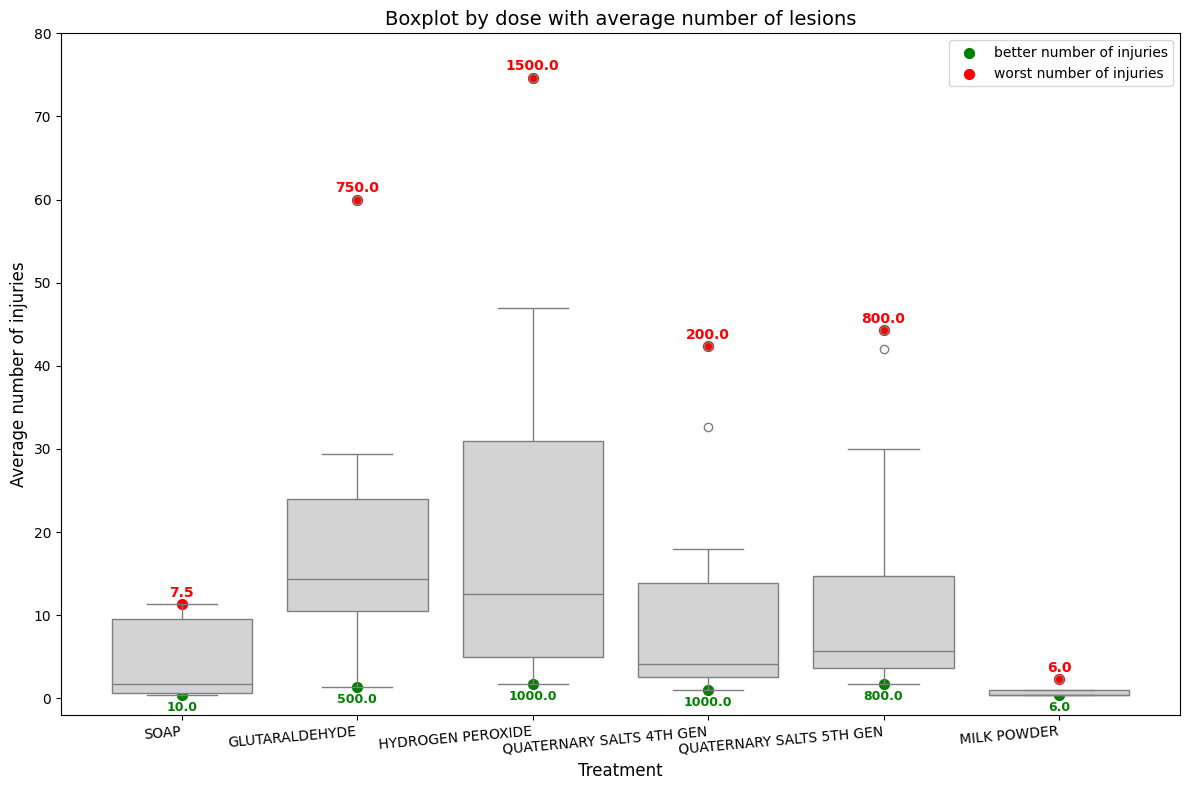

In [88]:
plt.figure(figsize=(12, 8))

# --- Boxplot ---
sns.boxplot(
    data=df,
    x="TREATMENT",
    y="AVERAGE INJURIES",
    color="lightgray"
)


# Y-axis limits (adjust to your needs)
plt.ylim(-2,80)

plt.xticks(rotation=5, ha='right')
plt.xlabel("Treatment", fontsize=12)
plt.ylabel("Average number of injuries", fontsize=12)
plt.title("Boxplot by dose with average number of lesions", fontsize=14)

# Add tags
for _, fila in mejores.iterrows():
    plt.text(fila["TREATMENT"], fila["AVERAGE INJURIES"] - 0.7, f"{fila['DOSE']}",
             color="green", ha='center', va='top', fontsize=9, fontweight='bold')
for _, fila in peores.iterrows():
    plt.text(fila["TREATMENT"], fila["AVERAGE INJURIES"] + 0.5, f"{fila['DOSE']}",
             color="red", ha='center', va='bottom', fontsize=10, fontweight='bold')

"""
# Añadir puntos individuales
sns.stripplot(
    data=df,
    x="TREATMENT",
    y="AVERAGE INJURIES",
    color="black",
    size=5,
    jitter=True
)
"""
# Green dot (better)
plt.scatter(
    mejores["TREATMENT"],
    mejores["AVERAGE INJURIES"],
    color="green",
    s=50,
    label="better number of injuries"
)

# Red dot (worst)
plt.scatter(
    peores["TREATMENT"],
    peores["AVERAGE INJURIES"],
    color="red",
    s=50,
    label="worst number of injuries"
)


plt.legend()
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ProcesamientoImagenes/ANOVA_TukeyHSD_Lesions_Dose_Treatment_boxplot.tiff", dpi=500, format="tiff",bbox_inches='tight', pad_inches=0.01)
plt.show()

# Correlation between dose and average number of injuries

In [67]:
print(df.head())

  TREATMENT  DOSE UNIT OF MEASUREMENT             SURFACE APPLICATION METHOD  \
0      SOAP   5.0                  mL  GREENHOUSE PLASTIC           SPRAYING   
1      SOAP   5.0                  mL     PRUNING SHEARS            SPRAYING   
2      SOAP   5.0                  mL     PRUNING SHEARS             DIPPING   
3      SOAP   7.5                  mL  GREENHOUSE PLASTIC           SPRAYING   
4      SOAP   7.5                  mL     PRUNING SHEARS            SPRAYING   

   NUMBER OF REPETITION INJURIES 1  NUMBER OF REPETITION INJURIES 2  \
0                                1                                1   
1                                0                                2   
2                                5                               21   
3                                2                                1   
4                               16                                5   

   NUMBER OF REPETITION INJURIES 3  AVERAGE INJURIES  TRANSFORMED  
0                       

In [68]:
#========================================================================================================================
# Remove the rows containing the words 'sana' and 'positiva', since in those cases no dose or treatment was applied.
#========================================================================================================================
df = df[~df['SURFACE'].isin(['HEALTHY', 'POSITIVE'])].reset_index(drop=True)


In [69]:
# ==============================
#Create a new DataFrame with the necessary columns
# ==============================
df_Pearson = df.copy()

In [70]:
# ==============================
#Enter the dose with one decimal place.
# ==============================
df_Pearson["DOSE"] = df_Pearson["DOSE"].round(1)

In [71]:
#==========================================
# Remove rows with null values ​​in DOSE or AVERAGE LESIONS o TRANSFORMED
#==========================================
df_Pearson = df_Pearson.dropna(subset=["DOSE", "AVERAGE INJURIES","TRANSFORMED"])

In [72]:
from scipy.stats import spearmanr

#==========================================
# Calculate the Pearson correlation
#==========================================
correlacion, p_value = spearmanr(df_Pearson['DOSE'], df_Pearson['AVERAGE INJURIES'])
print(f"\nCorrelation between dose and average number of injuries: {correlacion:.3f}")
print(f"Value p: {p_value:.3f}")


Correlation between dose and average number of injuries: 0.364
Value p: 0.001


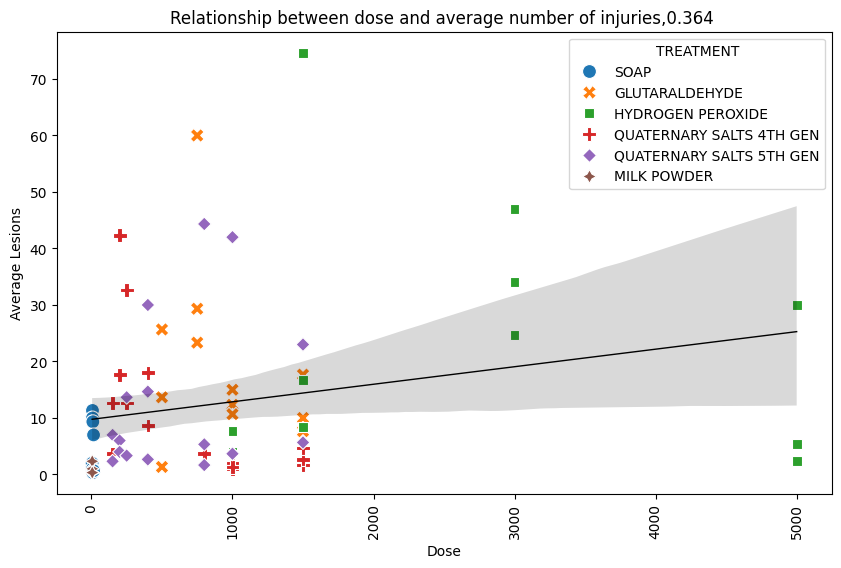

In [73]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='DOSE', y='AVERAGE INJURIES', hue='TREATMENT', style='TREATMENT', s=100)
sns.regplot(data=df, x='DOSE', y='AVERAGE INJURIES', scatter=False, color='black', line_kws={"linewidth":1})
plt.title(f"Relationship between dose and average number of injuries,{correlacion:.3f} ")
plt.xlabel("Dose")
plt.ylabel("Average Lesions")
plt.legend(title="TREATMENT")
plt.xticks(rotation=90)
plt.savefig("/content/drive/MyDrive/ProcesamientoImagenes/relacionDosisPromedioLasion.tiff", dpi=300, format="tiff",bbox_inches='tight', pad_inches=0.01)
plt.show()